# Analysis of FreeSurfer data
The following notebook will analyze the metrics received from volume measurements in FreeSurfer.

### Imports

In [1]:
import pandas as pd
import numpy as np
import glob, sys, os, json, utils
import matplotlib.pyplot as plt

In [2]:
def plot_histogram(X, x_label, y_label, title, label):
    '''
    Plots histogram of a feature
    '''
    plt.hist(X, label=label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

def get_data(csvFileName: str, ROI: []):
    '''
    The following function will sanitize data and build a numpy array with X ROI's volumes and y being the class [NC, PD]
    @csvFileName: input volumes csv
    @ROI: regions of interests desired
    '''
    df = pd.read_csv(csvFileName)
    df = utils.remove_unwanted_columns(df, ROI)
    df = utils.combine_left_right_vol(df)
        
    cols = list(df.columns.values)
    cols.pop(cols.index("subjectId"))
    df = df[["subjectId"]+cols]
    
    return df

In [7]:
ROI = [
    "subjectId", "initialHY", "followUpHY",
    "Left-Putamen", "Right-Putamen", 
    "Right-Caudate", "Left-Caudate", 
    "Right-Thalamus-Proper", "Left-Thalamus-Proper", 
    "Left-Pallidum", "Right-Pallidum", 
    "Left-Cerebellum-White-Matter", "Right-Cerebellum-White-Matter", 
    "Left-Cerebellum-Cortex", "Right-Cerebellum-Cortex",
    "3rd-Ventricle", 
    "4th-Ventricle",
    "Pons",
    "SCP",
    "Midbrain",
    "Insula",
    "Precentral Cortex"
]
df = get_data("../data/newVolumes.csv", ROI)
df

,subjectId,Pallidum,Putamen,Caudate,Thalamus-Proper,Cerebellum-Cortex,Cerebellum-White-Matter,3rd-Ventricle,4th-Ventricle,Pons,SCP,Midbrain,Insula,Precentral Cortex,initialHY,followUpHY
0,4037,4261.3,10223.0,7586.8,17351.7,116856.4,38230.0,934.2,1330.4,19552.781704,307.724746,6989.344230,6476,14648,1.0,2.0
1,3168,3776.7,8200.9,5738.2,13200.4,91395.5,31986.1,1089.4,1339.5,14452.019213,281.394581,5453.716726,7346,14228,2.0,3.0
2,4081,4129.3,8306.7,6229.6,12947.2,102468.4,29027.4,2091.1,2218.3,17518.805510,241.659897,6701.764578,7952,13808,2.0,2.0
3,3127,3934.3,10190.4,6675.7,14900.3,106143.6,35103.7,1079.8,1153.8,16162.873306,319.929339,6211.632660,7718,13868,1.0,2.0
4,3107,4297.7,9566.5,6421.7,14200.3,108640.7,34048.0,1621.5,1365.7,17140.805894,311.596000,6831.838037,7729,13522,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,3823,4106.6,10394.0,7483.6,13743.0,102140.8,27809.7,1355.9,1725.3,13519.944097,226.602924,5812.728759,7390,15027,1.0,2.0
76,3325,3939.1,9136.5,7239.2,14178.1,118630.7,33138.9,1698.1,2095.9,18443.846279,293.460180,7169.696370,7027,12883,1.0,2.0
77,3132,3834.1,10594.6,6311.2,14358.8,101102.9,30188.3,1029.0,1758.2,16432.475116,260.861801,6717.159272,7541,15369,2.0,2.0
78,3586,3709.8,8082.5,5973.9,13831.9,109396.4,29020.2,1464.9,1306.0,16415.510277,342.644554,6638.502535,6423,12962,1.0,2.0


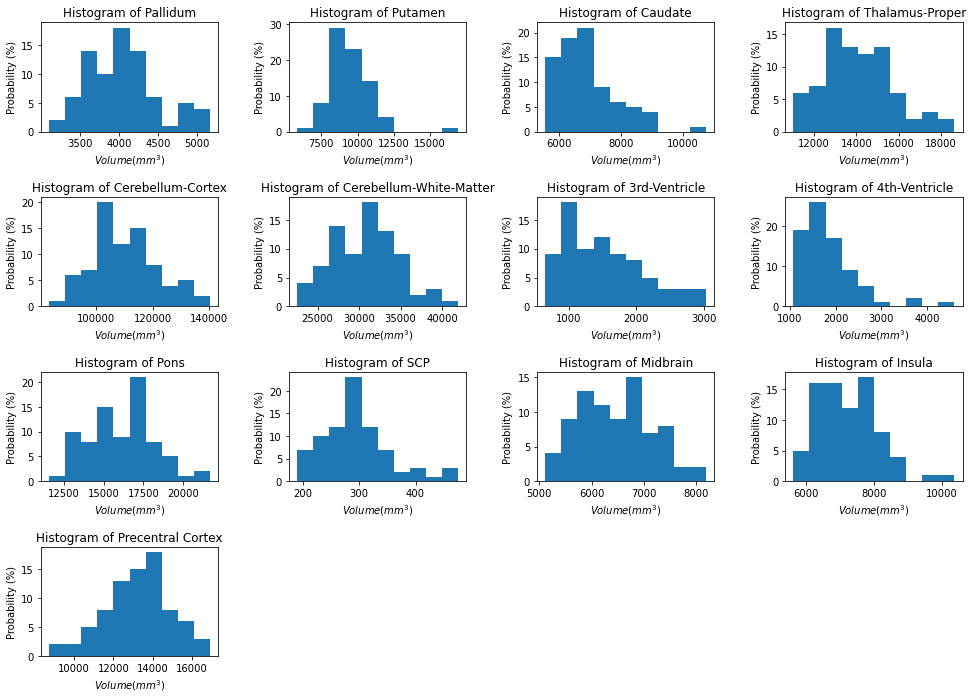

In [5]:
plt.figure(figsize=(16, 8)) 
index = 1
for column in df.columns[1:-2]:
    data = df[column].to_list()
    plt.subplot(4,4,index)
    plot_histogram(data, "$Volume (mm^{3}$)", "Probability (%)", f"Histogram of {column}", df.columns.to_list())
    index+=1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.6)